In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

NB: tutti i tempi d'orbita sono riferiti al raggio r=1 (e quindi non riguardano le orbite del sistema binario)

<center>

## <span style="color:blue;">Densità superficiale</span>

<center>


Provo a studiare il profilo di densità di un disco all'interno del quale si ha la presenza di un pianeta di massa gioviana. Il corpo in questione è abbastanza massivo da creare un gap con diminuzione della densità del materiale costituente il disco stesso.

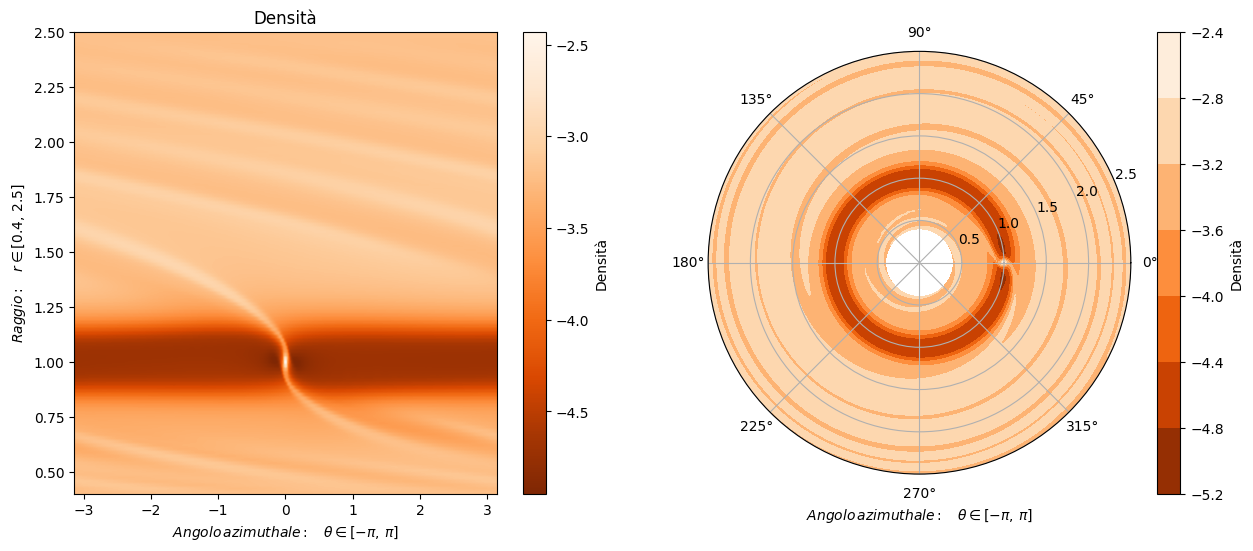

In [2]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 2.5, 128)
Theta, R = np.meshgrid(theta, r)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1)
rho = np.fromfile("Dati/Sistema1/ProfDens/gasdens500.dat").reshape(128,384)
im = ax1.imshow(np.log10(rho),origin='lower',cmap=cm.Oranges_r,aspect='auto', extent=[-np.pi, np.pi, 0.4, 2.5])
plt.colorbar(im, ax=ax1, label='Densità')
ax1.set_ylabel(r"$Raggio:\quad r \in \left[0.4,\,2.5\right]$")
ax1.set_xlabel(r"$Angolo\,azimuthale:\quad \theta \in \left[-\pi,\,\pi\right]$")
ax1.set_title(r"Densità")


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
cax = ax2.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
plt.colorbar(cax, label='Densità')
ax2.set_rmin(0)
ax2.set_rmax(2.5)
ax2.set_xlabel(r"$Angolo\,azimuthale:\quad \theta \in \left[-\pi,\,\pi\right]$")

plt.show()

Per andare a studiare il profilo di densità quello che faccio è mediare su anellini di spessore $\Delta r$.

In [3]:
den_sup = np.zeros(shape = (128, 3))
rho1 = np.fromfile("Dati/Sistema1/ProfDens/gasdens100.dat").reshape(128,384)
rho2 = np.fromfile("Dati/Sistema1/ProfDens/gasdens300.dat").reshape(128,384)

for i in range(0, 128):
    appo = np.zeros(3)
    for j in range(0, 384):
        appo[0] += np.log10(rho[i, j])
        appo[1] += np.log10(rho1[i, j])
        appo[2] += np.log10(rho2[i, j])
    appo = appo/384

    for k in range(0, 3):
        den_sup[i, k] = appo[k]

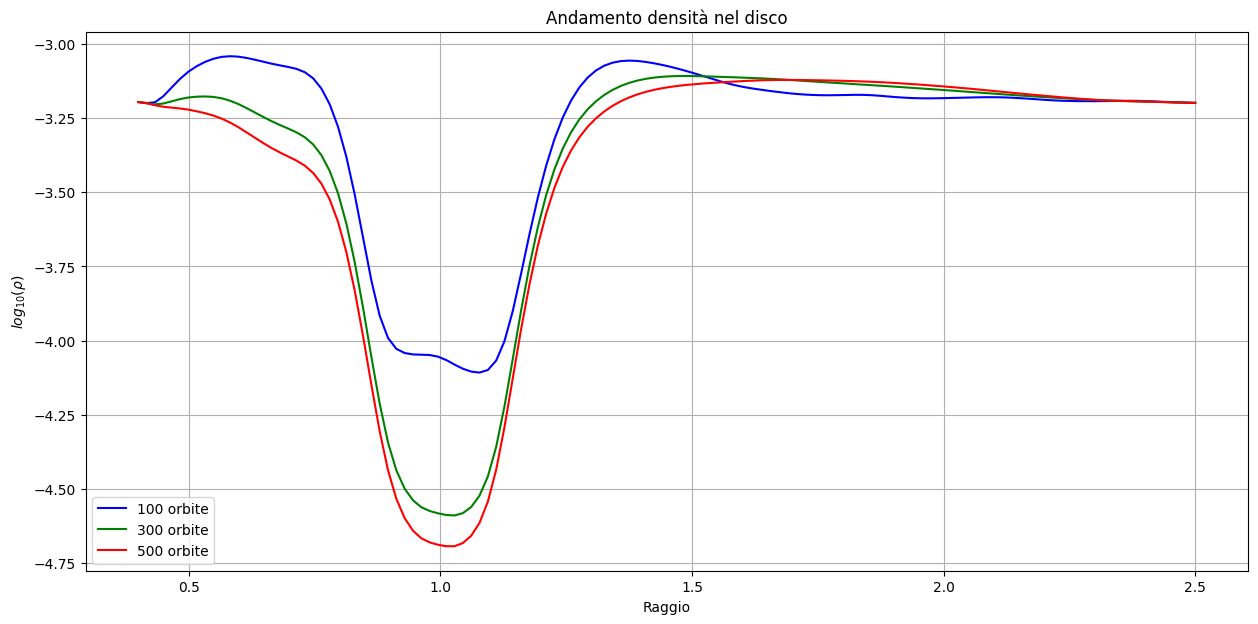

In [4]:
fig = plt.figure(figsize = (15, 7))
x = np.linspace(0.4, 2.5, 128)
plt.plot(x, den_sup[:, 1], color = 'blue', label = '100 orbite')
plt.plot(x, den_sup[:, 2], color = 'green', label = '300 orbite')
plt.plot(x, den_sup[:, 0], color = 'red', label = '500 orbite')
plt.title('Andamento densità nel disco')
plt.xlabel('Raggio')
plt.ylabel(r'$log_{10}(\rho)$')

plt.grid(True)
plt.legend()
plt.show()

<center>

## <span style="color:blue;">Cambio pianeta</span>

<center>

In questa sezione lavoro per effettuare gli output in maniera corretta. Il pianeta che utilizzo è caratterizzato da parametri differenti rispetto a giove, poichè ho creato un nuovo file per il pianeta.

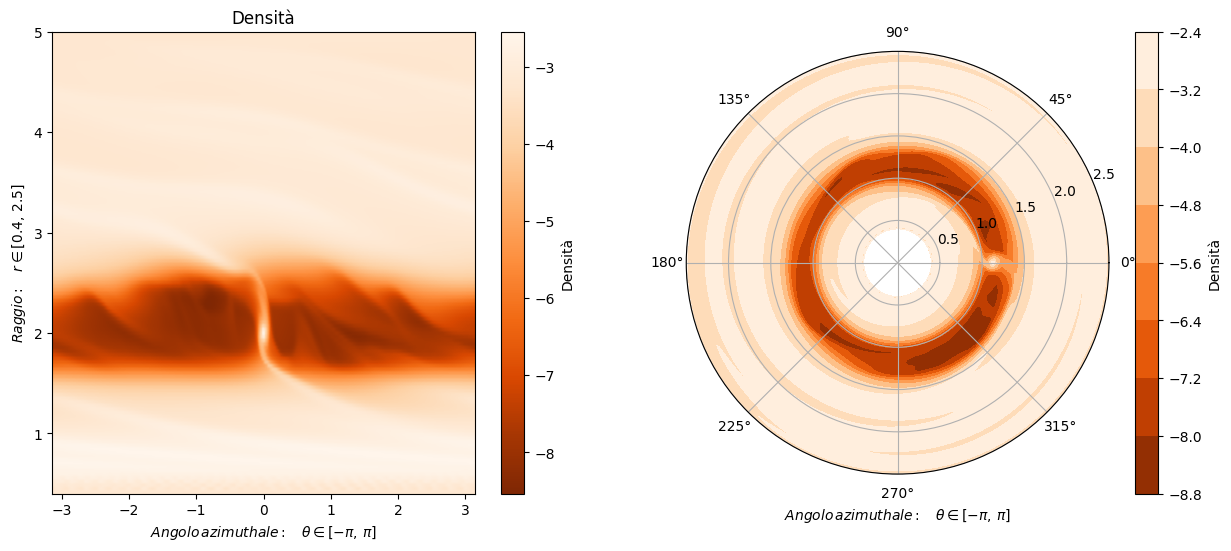

In [5]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 2.5, 128)
Theta, R = np.meshgrid(theta, r)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1)
rho = np.fromfile("Dati/Sistema1/Pianeta/gasdens500.dat").reshape(128,384)
im = ax1.imshow(np.log10(rho),origin='lower',cmap=cm.Oranges_r,aspect='auto', extent=[-np.pi, np.pi, 0.4, 5])
plt.colorbar(im, ax=ax1, label='Densità')
ax1.set_ylabel(r"$Raggio:\quad r \in \left[0.4,\,2.5\right]$")
ax1.set_xlabel(r"$Angolo\,azimuthale:\quad \theta \in \left[-\pi,\,\pi\right]$")
ax1.set_title(r"Densità")


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
cax = ax2.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
plt.colorbar(cax, label='Densità')
ax2.set_rmin(0)
ax2.set_rmax(2.5)
ax2.set_xlabel(r"$Angolo\,azimuthale:\quad \theta \in \left[-\pi,\,\pi\right]$")

plt.show()

Avevo impostato una distanza radiale pari a due (dove appunto si vede il pianeta nella configurazione finale) ed una massa di 5 masse gioviane. Il gap che si viene a creare è molto più ampio di quello che ho osservato in precedenza e la spirale lanciata più consistente.

<center>

## <span style="color:blue;">Configurazione iniziale</span>

<center>

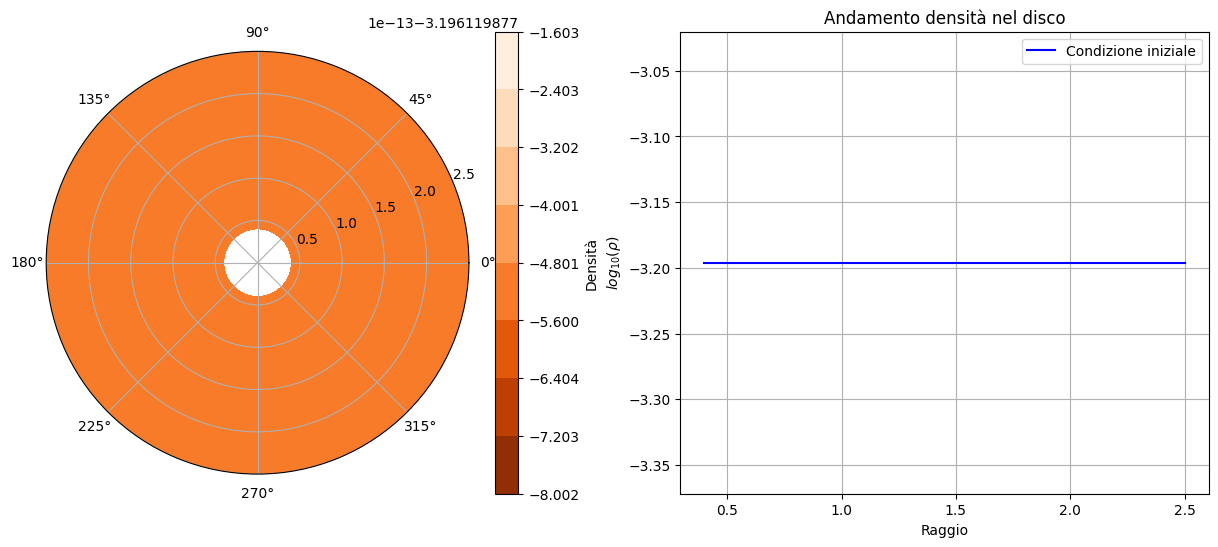

In [6]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 2.5, 128)
Theta, R = np.meshgrid(theta, r)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
rho = np.fromfile("Dati/Sistema1/Pianeta/gasdens0.dat").reshape(128,384)
cax = ax1.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
plt.colorbar(cax, label='Densità')
ax1.set_rmin(0)
ax1.set_rmax(2.5)


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2)
den_sup = np.zeros(128)

#Determino andamento della densità superficiale
for i in range(0, 128):
    appo = 0
    for j in range(0, 384):
        appo += np.log10(rho[i, j])

    appo = appo/384
    den_sup[i] = appo

ax2.plot(np.linspace(0.4, 2.5, 128), den_sup[:], color = 'blue', label = 'Condizione iniziale')
ax2.set_title('Andamento densità nel disco')
ax2.set_xlabel('Raggio')
ax2.set_ylabel(r'$log_{10}(\rho)$')
ax2.grid(True)
ax2.legend()

plt.show()

La configurazione iniziale è di densità costante per tutta la dimensione del disco.

<center>

## <span style="color:blue;">Cambio dimensioni griglia</span>

<center>

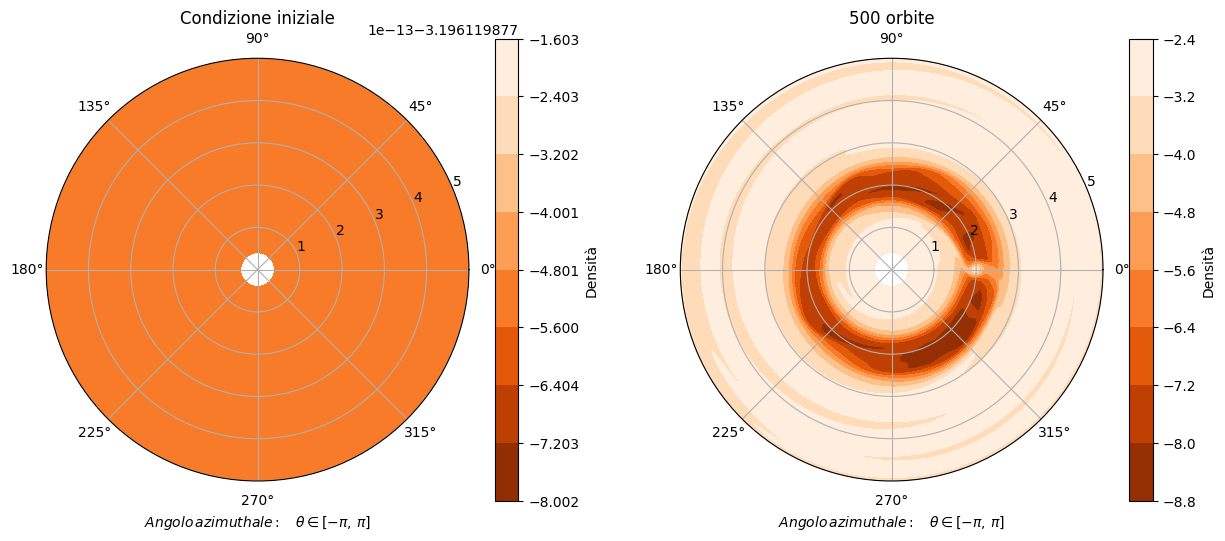

In [7]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 5, 128)
Theta, R = np.meshgrid(theta, r)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
rho = np.fromfile("Dati/Sistema1/AmpDisc/gasdens0.dat").reshape(128,384)
cax = ax1.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
plt.colorbar(cax, label='Densità')
ax1.set_rmin(0)
ax1.set_rmax(5)
ax1.set_xlabel(r"$Angolo\,azimuthale:\quad \theta \in \left[-\pi,\,\pi\right]$")
ax1.set_title(r"Condizione iniziale")


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
rho = np.fromfile("Dati/Sistema1/AmpDisc/gasdens500.dat").reshape(128,384)
cax = ax2.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
plt.colorbar(cax, label='Densità')
ax2.set_rmin(0)
ax2.set_rmax(5)
ax2.set_xlabel(r"$Angolo\,azimuthale:\quad \theta \in \left[-\pi,\,\pi\right]$")
ax2.set_title(r"500 orbite")

plt.show()

Noto che cambiando le dimensioni della griglia essa risulta comunque essere del tutto inizializzata: si avrà quindi una regione a densità costante con raggio che adesso va fino a 5. Per cambiare questo comportamento mi immagino che sarà necessario agire sul file che fornisce la condizione iniziale. 

<center>

## <span style="color:blue;">Cambio condizioni iniziali</span>

<center>

Quello che voglio provare a fare ora è avere una condizione iniziale in cui si abbia il disco a densità uniforme al centro, mentre verso l'esterno ho una regione vuota (che è quella che mi consentirà di osservare le variazioni del disco stesso). Come prima cosa provo ad avere un solo gas caratterizzato dall'avere due densità nettamente diverse nelle regioni prese in considerazione. Il disco ha raggio 8, la stella ha distanza 12 e massa 3.

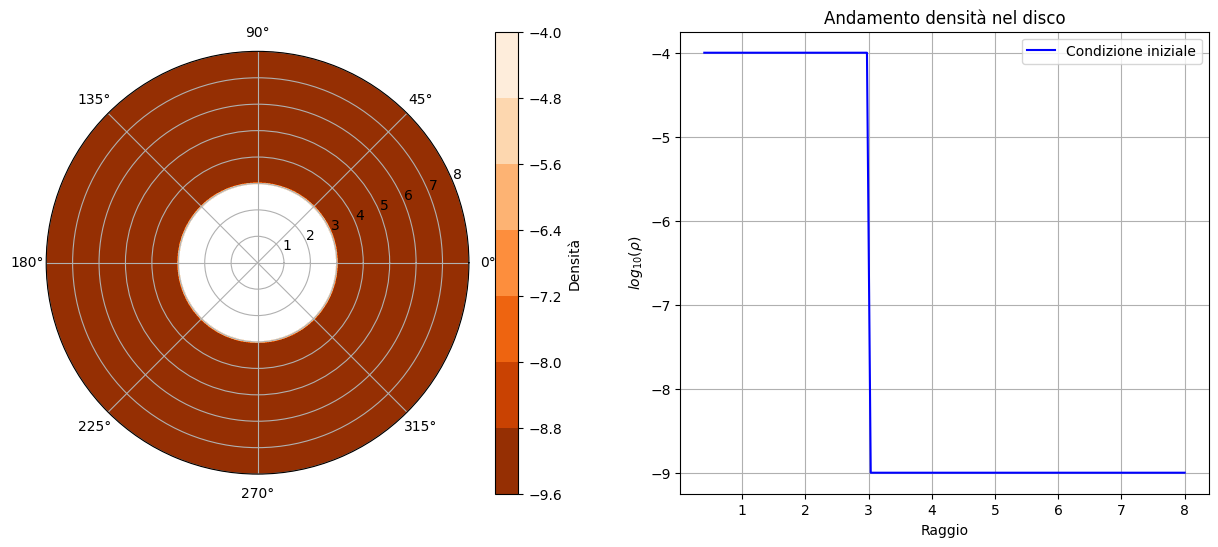

In [8]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 8, 128)
Theta, R = np.meshgrid(theta, r)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
rho = np.fromfile("Dati/Sistema1/CamCI/prova1.0.dat").reshape(128,384)
cax = ax1.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
plt.colorbar(cax, label='Densità')
ax1.set_rmin(0)
ax1.set_rmax(8)


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2)
den_sup = np.zeros(128)

#Determino andamento della densità superficiale
for i in range(0, 128):
    appo = 0
    for j in range(0, 384):
        appo += np.log10(rho[i, j])

    appo = appo/384
    den_sup[i] = appo

ax2.plot(np.linspace(0.4, 8, 128), den_sup[:], color = 'blue', label = 'Condizione iniziale')
ax2.set_title('Andamento densità nel disco')
ax2.set_xlabel('Raggio')
ax2.set_ylabel(r'$log_{10}(\rho)$')
ax2.grid(True)
ax2.legend()

plt.show()

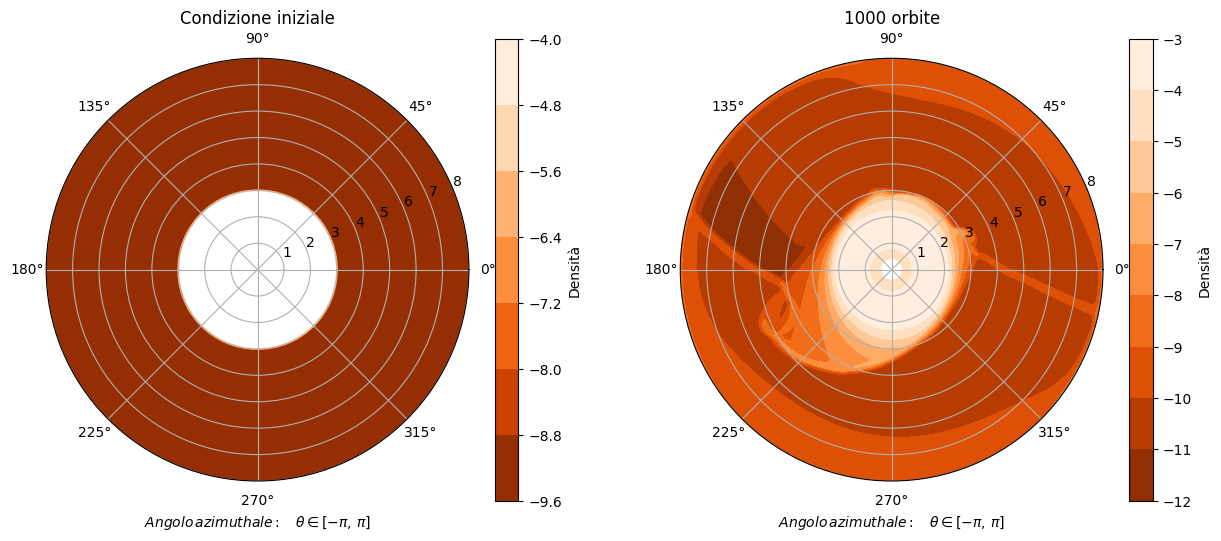

In [9]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 8, 128)
Theta, R = np.meshgrid(theta, r)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
rho = np.fromfile("Dati/Sistema1/CamCI/prova1.0.dat").reshape(128,384)
cax = ax1.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
plt.colorbar(cax, label='Densità')
ax1.set_rmin(0)
ax1.set_rmax(8)
ax1.set_title(r"Condizione iniziale")
ax1.set_xlabel(r"$Angolo\,azimuthale:\quad \theta \in \left[-\pi,\,\pi\right]$")


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
rho = np.fromfile("Dati/Sistema1/CamCI/prova1.1000.dat").reshape(128,384)
cax = ax2.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
plt.colorbar(cax, label='Densità')
ax2.set_rmin(0)
ax2.set_rmax(8)
ax2.set_title(r"1000 orbite")
ax2.set_xlabel(r"$Angolo\,azimuthale:\quad \theta \in \left[-\pi,\,\pi\right]$")

plt.show()

Provo ora a lavorare con un sistema che non sia caratterizzato dall'avere densità uniforme. In particolare lavoro con: SIGMASLOPE = 0.5. La massa della seconda stella è pari a 3 e si trova ad una distanza 12 dal centro del sdr.

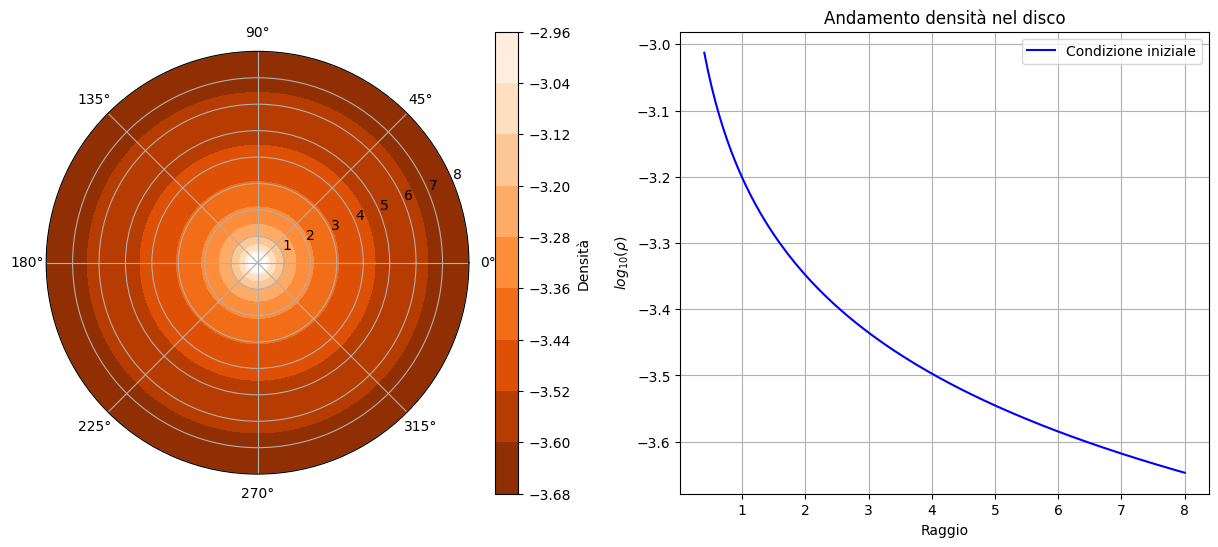

In [10]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 8, 128)
Theta, R = np.meshgrid(theta, r)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
rho = np.fromfile("Dati/Sistema1/CamCI/prova2.0.dat").reshape(128,384)
cax = ax1.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
plt.colorbar(cax, label='Densità')
ax1.set_rmin(0)
ax1.set_rmax(8)


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2)
den_sup = np.zeros(128)

#Determino andamento della densità superficiale
for i in range(0, 128):
    appo = 0
    for j in range(0, 384):
        appo += np.log10(rho[i, j])

    appo = appo/384
    den_sup[i] = appo

ax2.plot(np.linspace(0.4, 8, 128), den_sup[:], color = 'blue', label = 'Condizione iniziale')
ax2.set_title('Andamento densità nel disco')
ax2.set_xlabel('Raggio')
ax2.set_ylabel(r'$log_{10}(\rho)$')
ax2.grid(True)
ax2.legend()

plt.show()

Effettuo allora la simulazione con un profilo di densità di questo genere. Quello che osservo è che:

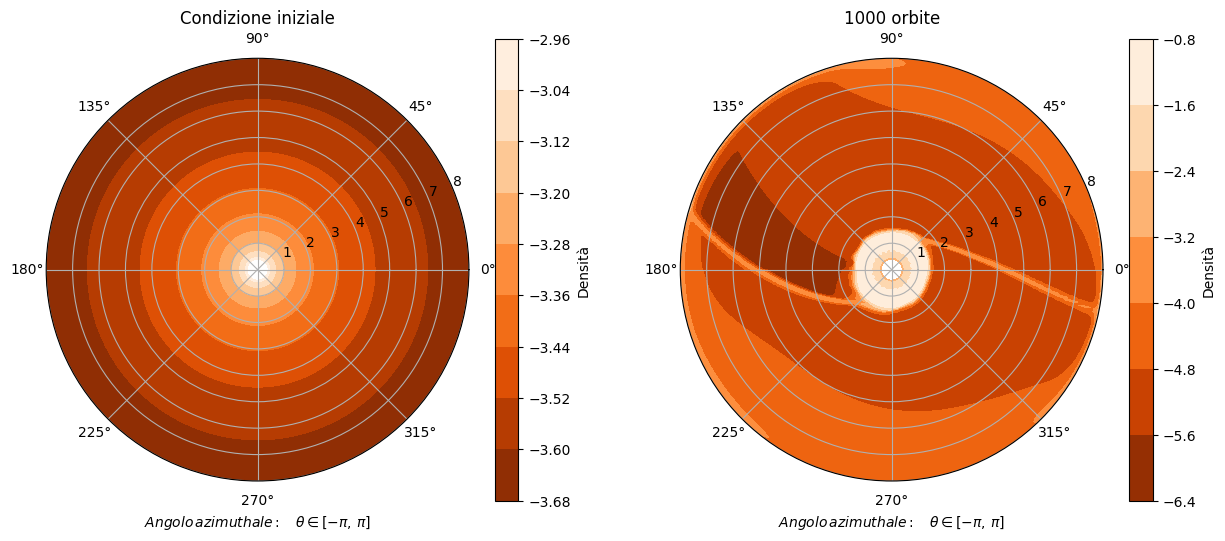

In [19]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 8, 128)
Theta, R = np.meshgrid(theta, r)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
rho = np.fromfile("Dati/Sistema1/CamCI/prova2.0.dat").reshape(128,384)
cax = ax1.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
plt.colorbar(cax, label='Densità')
ax1.set_rmin(0)
ax1.set_rmax(8)
ax1.set_title(r"Condizione iniziale")
ax1.set_xlabel(r"$Angolo\,azimuthale:\quad \theta \in \left[-\pi,\,\pi\right]$")


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
rho = np.fromfile("Dati/Sistema1/CamCI/prova2.1000.dat").reshape(128,384)
cax = ax2.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
plt.colorbar(cax, label='Densità')
ax2.set_rmin(0)
ax2.set_rmax(8)
ax2.set_title(r"1000 orbite")
ax2.set_xlabel(r"$Angolo\,azimuthale:\quad \theta \in \left[-\pi,\,\pi\right]$")

plt.show()

<center>

## <span style="color:blue;">Dopo quanto raggiungo lo stato quasi-stazionario?</span>

<center>

Voglio capire dopo quanto tempo raggiungo uno stato che sia possibile ritenere quasi-stazionario, questo per evitare di fare delle simulazioni troppo lunghe e velocizzare le operazioni.

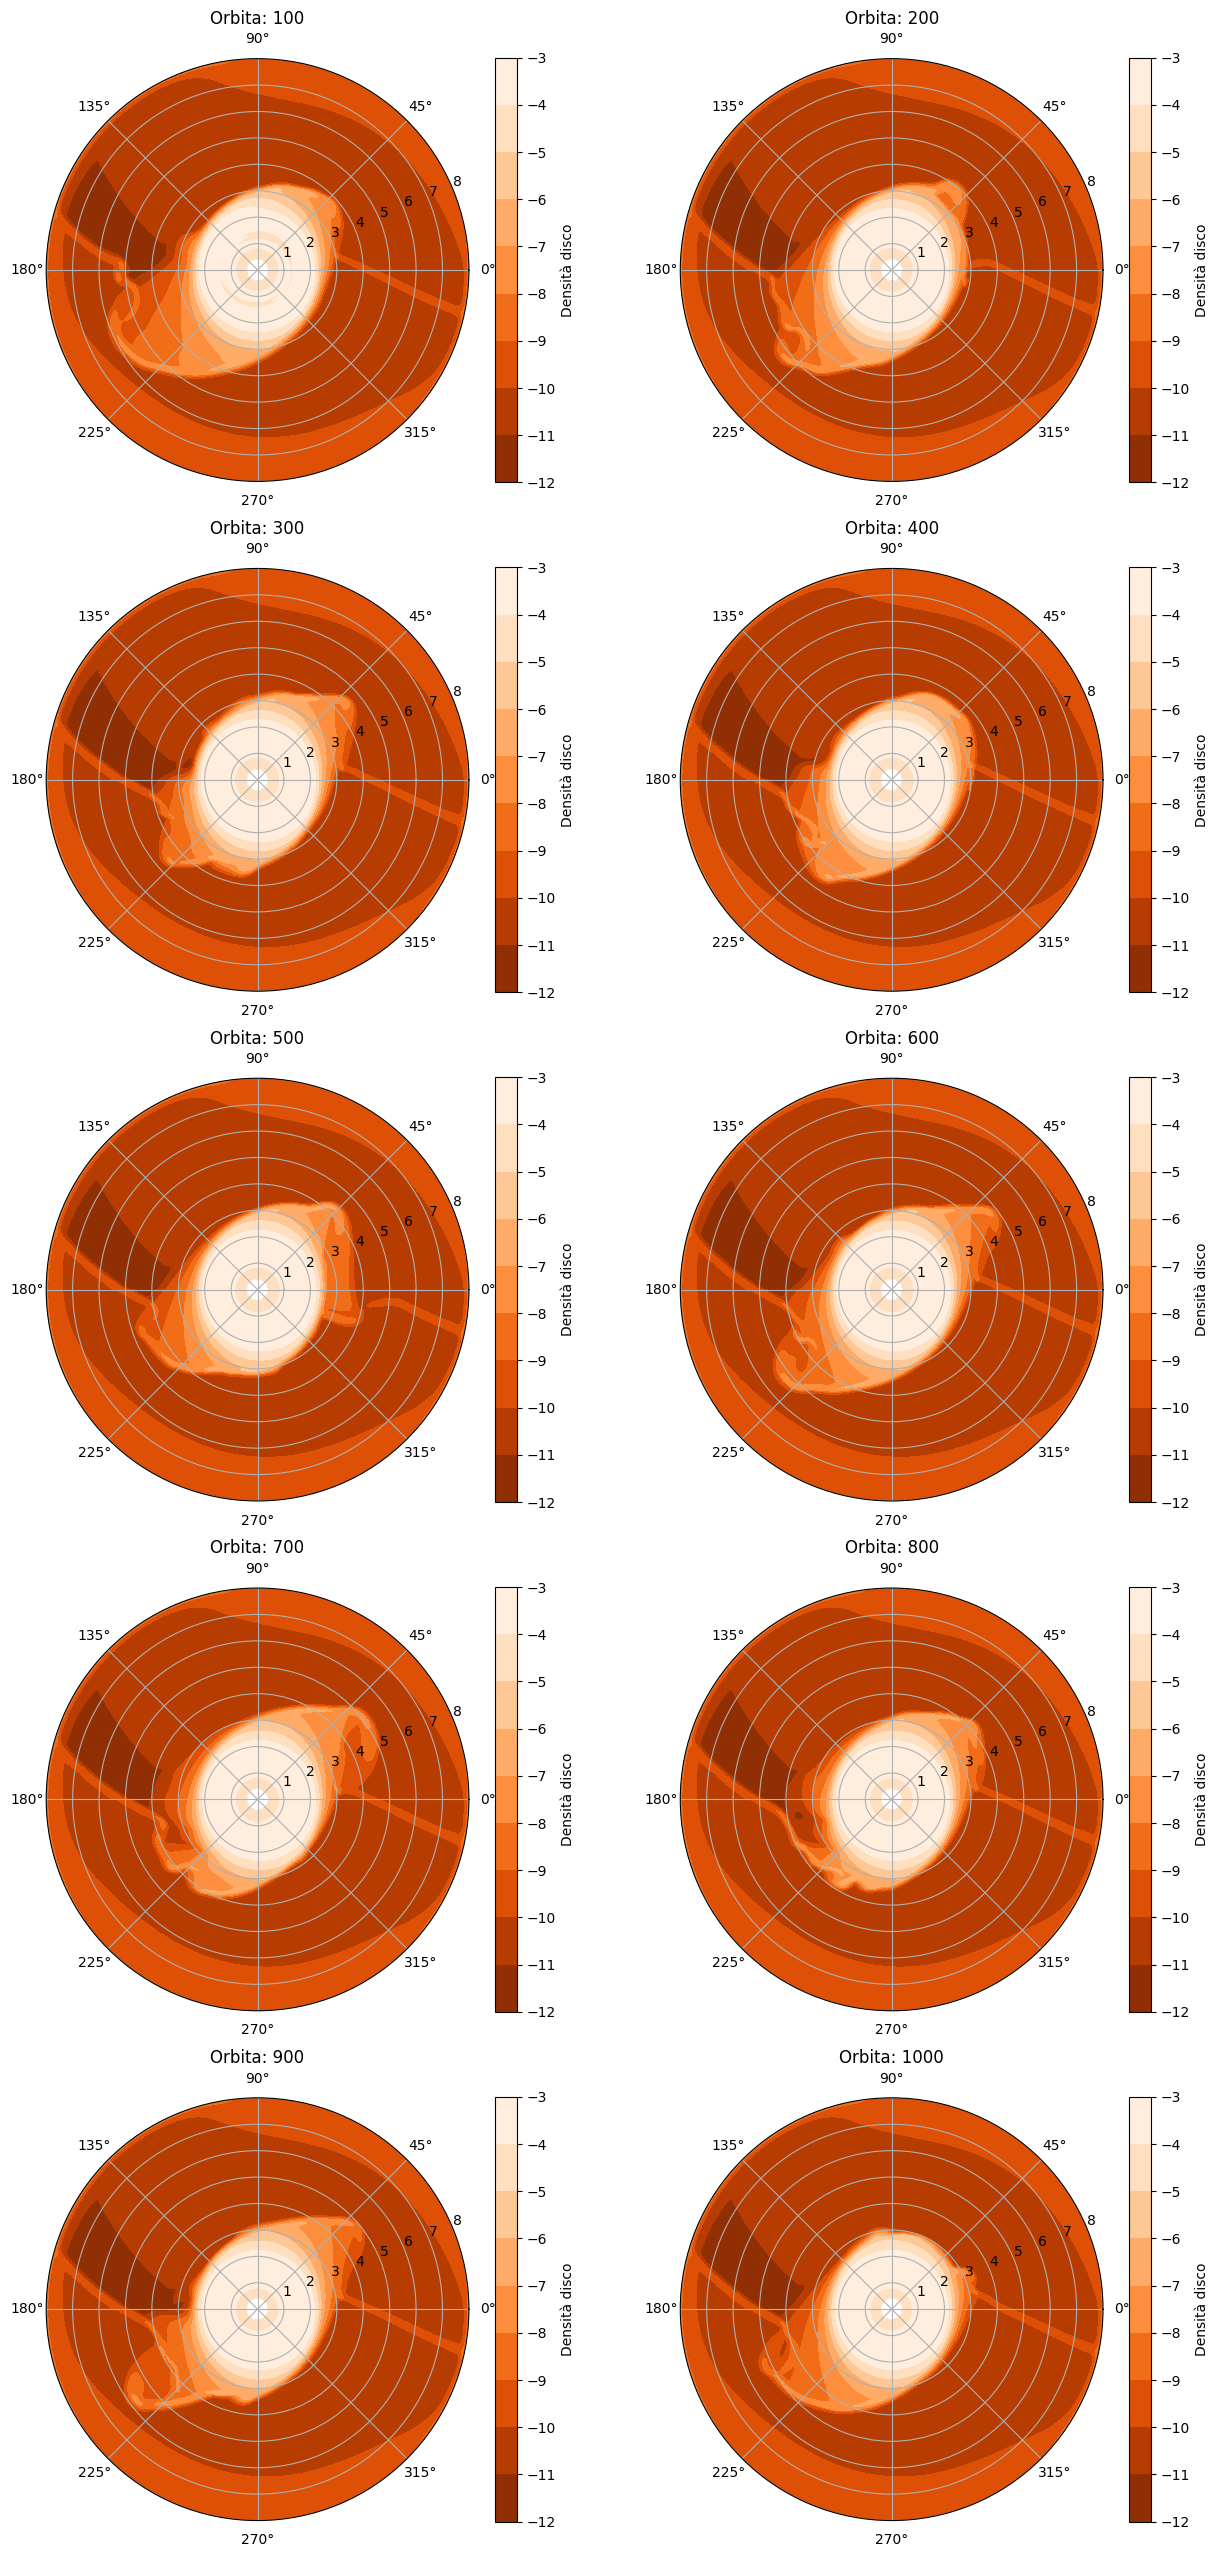

In [12]:
# Impostare il numero di grafici polari che desideri nella stessa figura
num_grafici = 10

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 8, 128)
Theta, R = np.meshgrid(theta, r)

# Creare una figura con più grafici polari
fig, axs = plt.subplots(5, 2, figsize=(15, 32), subplot_kw={'projection': 'polar'})

for i in range(0, 5):
    for j in range(0, 2):
        ax = axs[i, j]

        #Valori assunti dalla funzione
        rho = np.fromfile("Dati/Sistema1/StStaz/gasdens"+ str((2*i+j+1)*100) + ".dat").reshape(128, 384)

        # Disegnare il grafico polare
        cax = ax.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
        plt.colorbar(cax, label='Densità disco')
        ax.set_rmin(0)
        ax.set_rmax(8)
        ax.set_title(f'Orbita: ' + str((2*i+j+1)*100))
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

La forma dei vari dischi mi sembra confrontabile per tutti gli output che ho disegnato. Provo allora a vedere quanto accade nelle prime 100 evoluzioni del sistema.

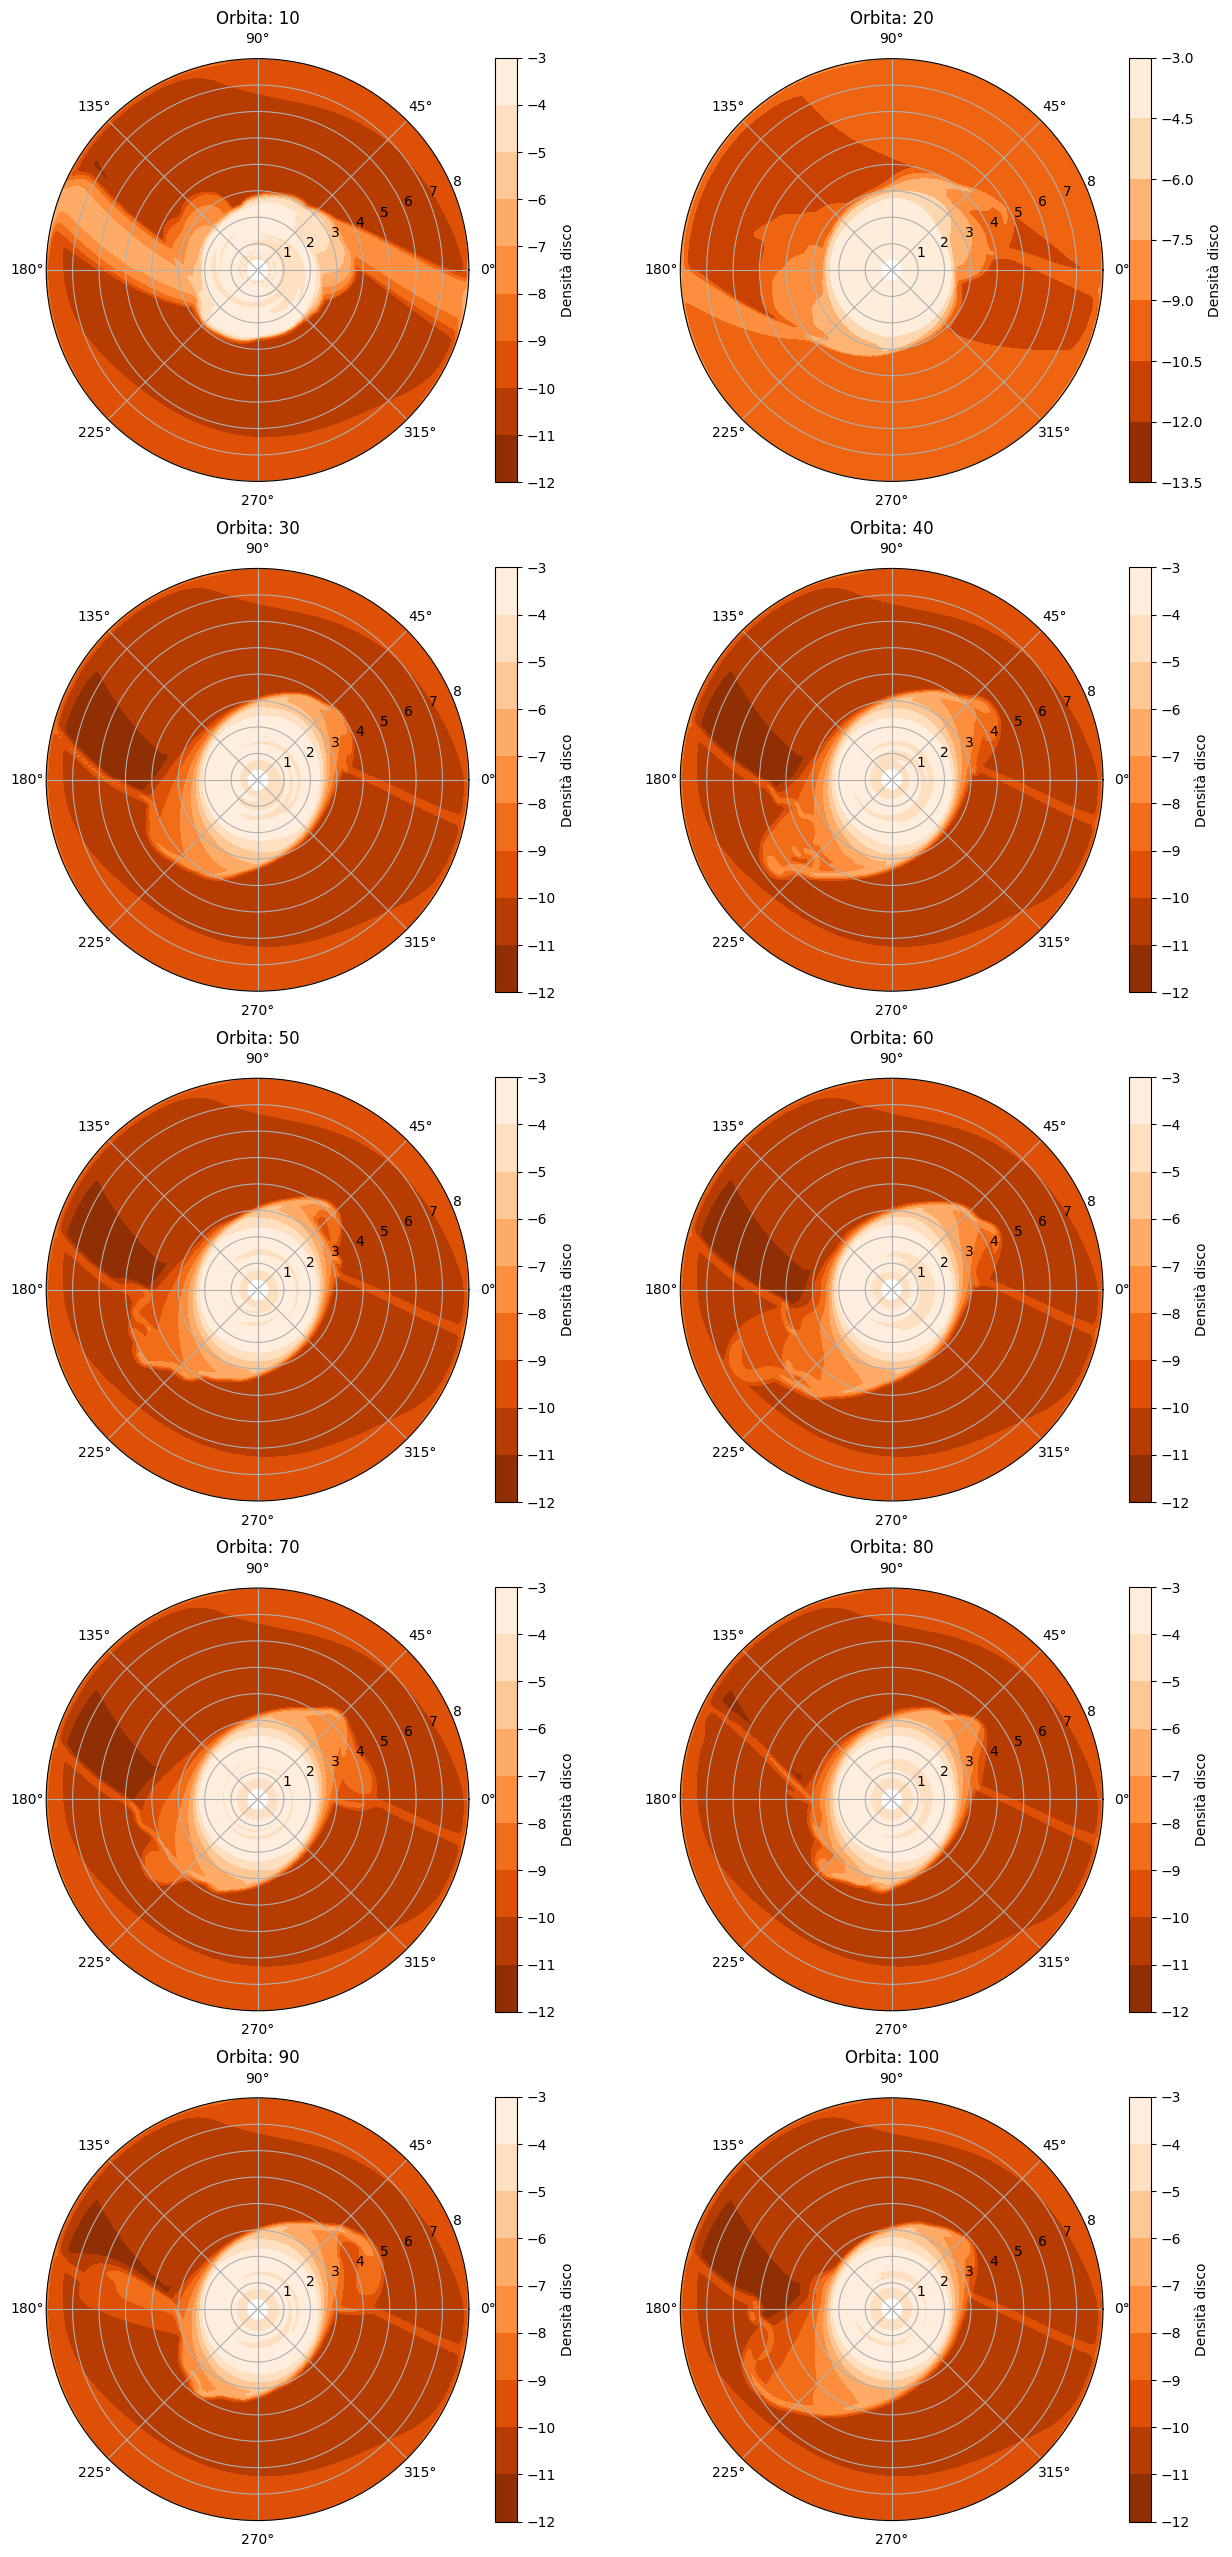

In [13]:
# Impostare il numero di grafici polari che desideri nella stessa figura
num_grafici = 10

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 8, 128)
Theta, R = np.meshgrid(theta, r)

# Creare una figura con più grafici polari
fig, axs = plt.subplots(5, 2, figsize=(15, 32), subplot_kw={'projection': 'polar'})

for i in range(0, 5):
    for j in range(0, 2):
        ax = axs[i, j]

        #Valori assunti dalla funzione
        rho = np.fromfile("Dati/Sistema1/StStaz/gasdens"+ str((2*i+j+1)*10) + ".dat").reshape(128, 384)

        # Disegnare il grafico polare
        cax = ax.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
        plt.colorbar(cax, label='Densità disco')
        ax.set_rmin(0)
        ax.set_rmax(8)
        ax.set_title(f'Orbita: ' + str((2*i+j+1)*10))
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

Ad un primo sguardo rapido sembra che le prime orbite 30 orbite costituiscano una sorta di transitorio fra la condizione iniziale e quella stabile. Per questo motivo provo ad analizzarle ancora più nello specifico.

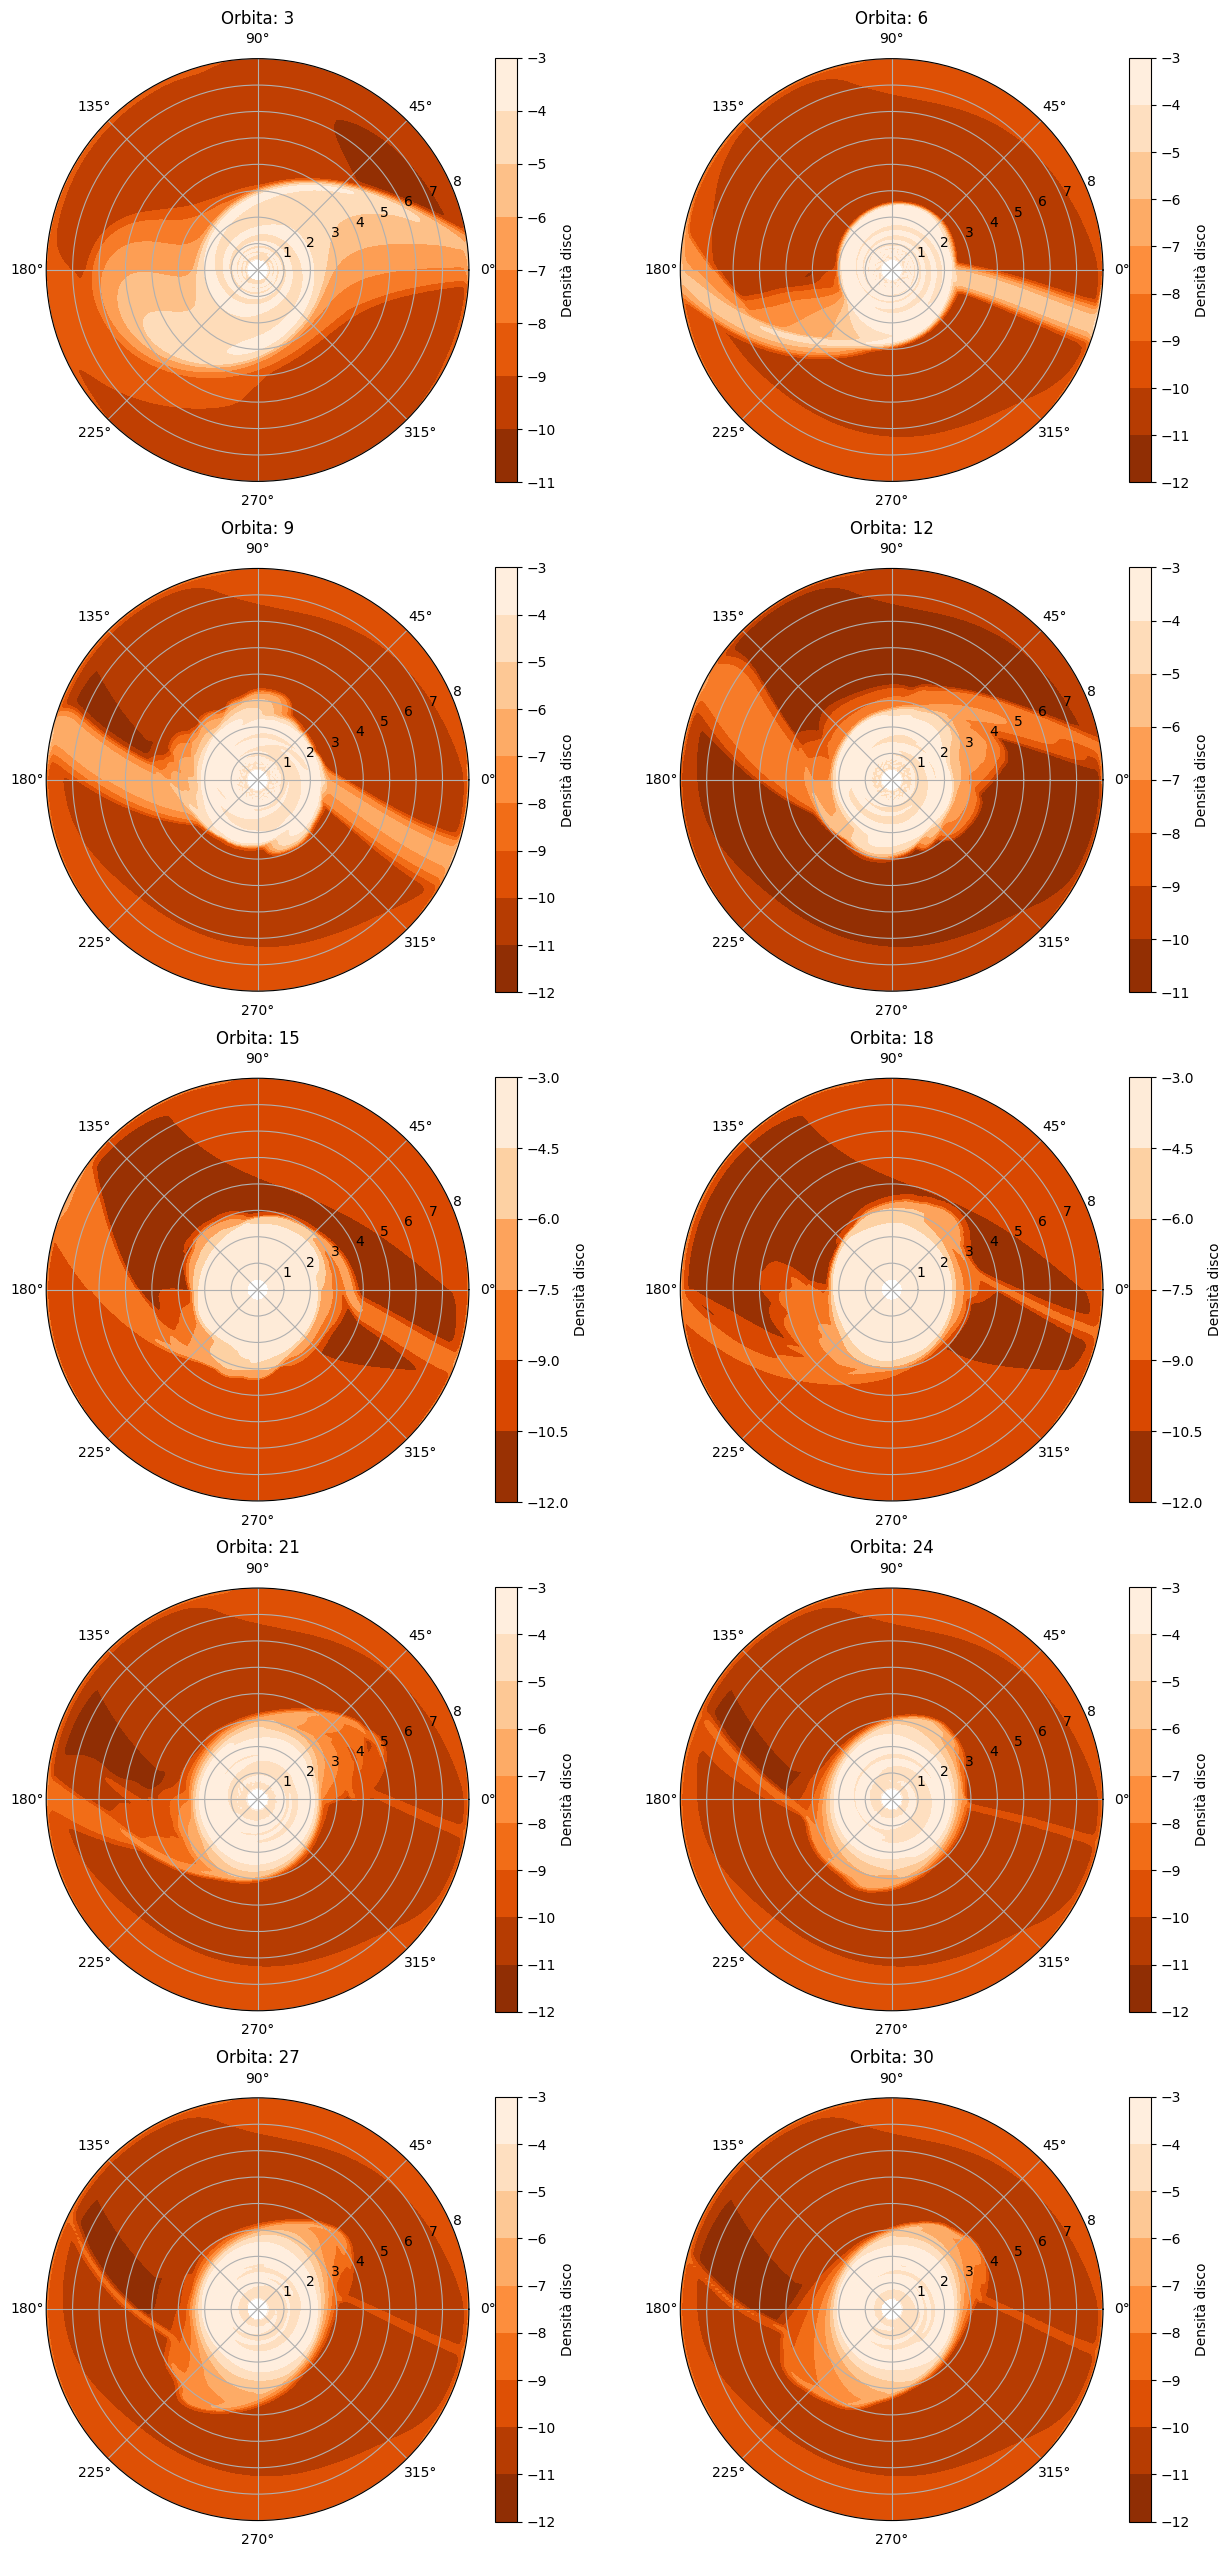

In [14]:
# Impostare il numero di grafici polari che desideri nella stessa figura
num_grafici = 10

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 8, 128)
Theta, R = np.meshgrid(theta, r)

# Creare una figura con più grafici polari
fig, axs = plt.subplots(5, 2, figsize=(15, 32), subplot_kw={'projection': 'polar'})

for i in range(0, 5):
    for j in range(0, 2):
        ax = axs[i, j]

        #Valori assunti dalla funzione
        rho = np.fromfile("Dati/Sistema1/StStaz/gasdens"+ str((2*i+j+1)*3) + ".dat").reshape(128, 384)

        # Disegnare il grafico polare
        cax = ax.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
        plt.colorbar(cax, label='Densità disco')
        ax.set_rmin(0)
        ax.set_rmax(8)
        ax.set_title(f'Orbita: ' + str((2*i+j+1)*3))
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

<center>

## <span style="color:blue;">Critieri per il gap opening</span>

<center>

Provo a vedere quale sia il profilo di densità del disco dopo trenta orbite del sistema stesso.

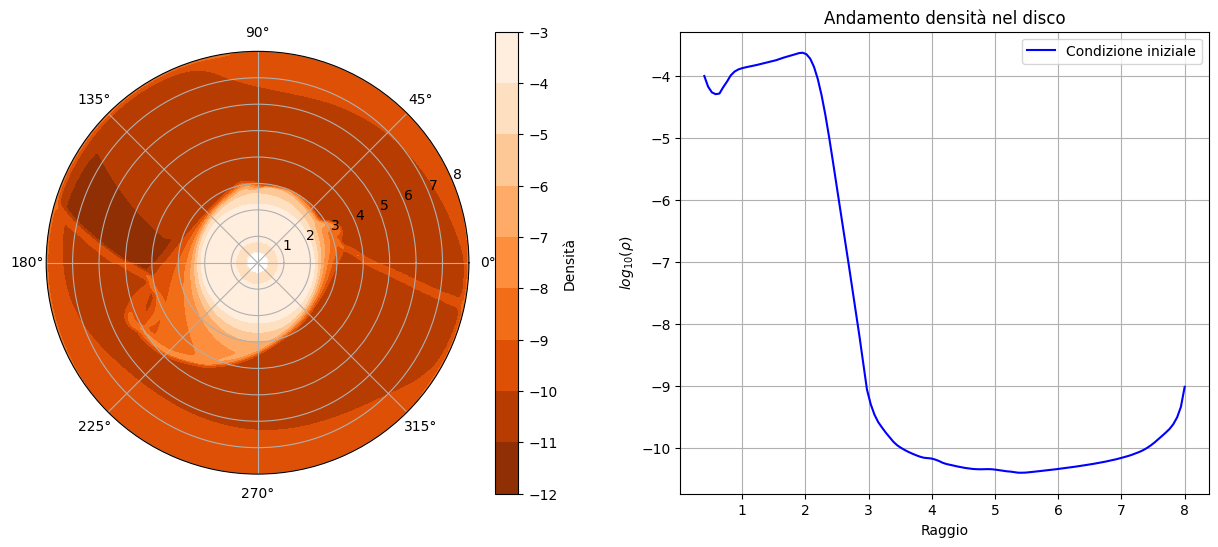

In [15]:
fig = plt.figure(figsize=(15, 6))

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 384)
r = np.linspace(0.4, 8, 128)
Theta, R = np.meshgrid(theta, r)

#Grafico 1
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
rho = np.fromfile("Dati/Sistema1/StStaz/gasdens1000.dat").reshape(128,384)
cax = ax1.contourf(Theta, R, np.log10(rho), cmap=cm.Oranges_r)
plt.colorbar(cax, label='Densità')
ax1.set_rmin(0)
ax1.set_rmax(8)


#Grafico 2
ax2 = fig.add_subplot(1, 2, 2)
den_sup = np.zeros(128)

#Determino andamento della densità superficiale
for i in range(0, 128):
    appo = 0
    for j in range(0, 384):
        appo += np.log10(rho[i, j])

    appo = appo/384
    den_sup[i] = appo

ax2.plot(np.linspace(0.4, 8, 128), den_sup[:], color = 'blue', label = 'Condizione iniziale')
ax2.set_title('Andamento densità nel disco')
ax2.set_xlabel('Raggio')
ax2.set_ylabel(r'$log_{10}(\rho)$')
ax2.grid(True)
ax2.legend()

plt.show()

In sintonia con quanto fatto nel paper di Artymowicz faccio la media non solo azimuthale, ma anche quella temporale. Cosidero allora le orbite dalla trenta alla cinquanta.

In [16]:
dens = np.zeros(128)

#Itero sulle varie configurazioni considerate
for k in range(0, 21):
    #Considero configurazione desiderata
    rho = np.fromfile("Dati/Sistema1/GapOpen/gasdens" +str(30+k)+".dat").reshape(128,384)

    #Determino andamento della densità superficiale
    for i in range(0, 128):
        appo = 0
        for j in range(0, 384):
            appo += np.log10(rho[i, j])

        appo = appo/384
        dens[i] += appo

dens = dens/21  

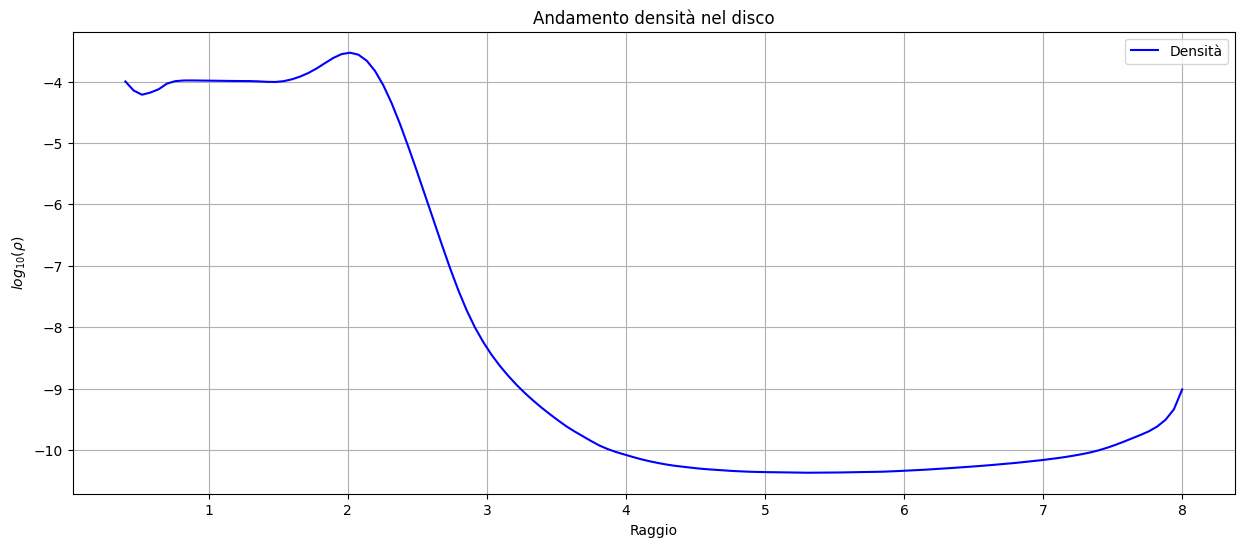

In [17]:
fig = plt.figure(figsize = (15, 6))
x = np.linspace(0.4, 8, 128)
plt.plot(x, dens, color = 'blue', label = 'Densità')
plt.title('Andamento densità nel disco')
plt.xlabel('Raggio')
plt.ylabel(r'$log_{10}(\rho)$')

plt.grid(True)
plt.legend()
plt.show()